# ta-lib-008 ( Feature‑Engineering + Sequence Models)
https://chatgpt.com/c/680d231a-52f4-800a-a105-9f5bfe49fca1

What's new:

1-

# Load your historical Forex data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

In [5]:
# PARAMETERS
DATA_PATH = 'datasets/XAGUSD-H1-rates.csv'   # Path to your historical Forex data CSV
MODEL_SAVE_PATH = 'lstm_forex_model.h5'
WINDOW_SIZE = 30              # Number of past candles used as input
FORECAST_HORIZON = 10         # Number of future candles to predict
BATCH_SIZE = 32
EPOCHS = 2
LEARNING_RATE = 0.001
TEST_SIZE = 0.2               # % of data for validation
TARGET_COLUMN = '<CLOSE>'       # Which price to predict: '<CLOSE>', 'open', etc.

In [6]:

df = pd.read_csv(DATA_PATH, sep='\t')

# Basic cleaning if necessary
df = df.dropna()
# Feature Engineering (TA-Lib indicators)
def add_ta_features(df):
    df['rsi'] = talib.RSI(df['<CLOSE>'], timeperiod=14)
    df['macd'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['<CLOSE>'])
    df['ema_10'] = talib.EMA(df['<CLOSE>'], timeperiod=10)
    df['ema_50'] = talib.EMA(df['<CLOSE>'], timeperiod=50)
    df['atr'] = talib.ATR(df['<HIGH>'], df['<LOW>'], df['<CLOSE>'], timeperiod=14)
    df['adx'] = talib.ADX(df['<HIGH>'], df['<LOW>'], df['<CLOSE>'], timeperiod=14)
    df = df.dropna()
    return df


df = add_ta_features(df)
# Scaling Features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>', 'rsi', 'macd', 'ema_10', 'ema_50', 'atr', 'adx']])
def create_sequences(features, target, window_size, forecast_horizon):
    X, y = [], []
    for i in range(window_size, len(features) - forecast_horizon):
        X.append(features[i-window_size:i])
        y.append(target[i:i+forecast_horizon])
    return np.array(X), np.array(y)

# Prepare data
target_data = df[TARGET_COLUMN].values
X, y = create_sequences(scaled_features, target_data, WINDOW_SIZE, FORECAST_HORIZON)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, shuffle=False)
def build_model(input_shape, forecast_horizon, learning_rate):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(forecast_horizon)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = build_model((X_train.shape[1], X_train.shape[2]), FORECAST_HORIZON, LEARNING_RATE)
# Training model
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks=[es]
)
# Predict
y_pred = model.predict(X_test)


I0000 00:00:1746462426.030823   12666 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2295 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5
/home/saeed/repositories/machine-learning/forex-prediction/envs/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2


I0000 00:00:1746462428.599687   12930 cuda_dnn.cc:529] Loaded cuDNN version 90800


1375/1375 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 124.6277 - val_loss: 23.4226
Epoch 2/2
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 17.0425 - val_loss: 1.3936
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# plot section

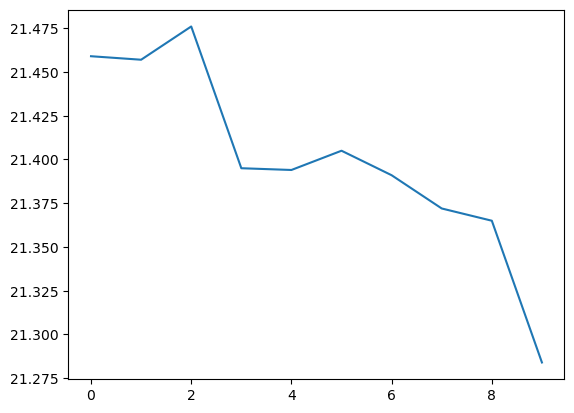

In [7]:
plt.plot(range(10), y_test[0])
plt.show()


In [18]:
from utils import forex_plot_utils

In [14]:
# LOAD DATA
predicted_df = forex_plot_utils.load_csv_with_datetime(csv2_path)


# PLOT
forex_plot_utils.plot_all_series(
    predicted_df=predicted_df,
)

NameError: name 'forex_plot_utils' is not defined